In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as widg
from IPython.display import clear_output
import sys
import scipy.stats as sts
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
class Network:
    def __init__(self, shape):
        """The base network class. This defines a simple feed-forward network with appropriate weights and biases.
        
        Arguments:
        shape (list-like): This defines the # of layers and # of neurons per layer in your network.
                           Each element of the array or list adds a new layer with the number neurons specified by the element.
        Variables:
        self.shape: see shape.
        self.weights: A list of numpy arrays containing the weights corresponding to each channel between neurons.
        self.biases: A list of numpy arrays containing the biases corresponding to each neuron.
        self.errors: A list of numpy arrays containing the error of each neurons in any iteration of the training process.
        self.eta: A float representing the learning rate.
        self.lam: A scale factor used in L2 regularization
        """
        
        self.shape = np.array(shape) #shape is array-like, i.e. (2,3,4) is a 2 input, 3 hidden node, 4 output network
        self.weights = [np.random.ranf((self.shape[i],self.shape[i-1]))*.1 for i in range(1,len(self.shape))]
        self.biases = [np.random.ranf((self.shape[i],))*.1 for i in range(1,len(self.shape))]
        self.errors = [np.random.ranf((self.shape[i],)) for i in range(1,len(self.shape))]
        self.eta = .1
        self.lam = .01
        self.wrong = 0
        self.total = 0
    def sigmoid(self, inputs):
        """Computes the sigmoid function of some input.
        
        Arguments:
        inputs (float or numpy array): The input or inputs to be fed through the sigmoid function.
        """
        
        return 1/(1+np.exp(-inputs))
    def feedforward(self, inputs):
        """Feeds inputs through the network and returns the output.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        
        Variables:
        self.activation: A list of numpy arrays corresponding to the output of each neuron in your network.
        """
        
        assert inputs.shape==self.shape[0] #inputs must feed directly into the first layer.
        self.activation = [np.zeros((self.shape[i],)) for i in range(len(self.shape))]
        self.activation[0] = inputs
        for i in range(1,len(self.shape)):
            self.activation[i]=self.sigmoid(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])
        return self.activation[-1]
    def calc_learning_rate(self,grad):
        if grad>.9:
            self.eta=.1/grad**.1*1/(.25*(2*np.pi)**.5)*np.exp(-(grad)**2/(2*(.25)**2))
        else:
            self.eta=.1/grad**.7*1/(.4*(2*np.pi)**.5)*np.exp(-(grad)**2/(2*(.4)**2))*(grad+.08)
        self.wrong+=grad
        self.total+=grad
    def comp_error(self, answer):
        """Computes the errors of each neuron.(Typically called Back Propagation)
        
        Arguments:
        answers (numpy array): The expected output from the network.
        """
#         if (self.activation[-1]-answer).any>.15:
#             self.eta = .005
#         else: 
#             self.eta = .5
        self.calc_learning_rate(np.amax(np.abs((self.activation[-1]-answer))))
        #print(np.amax(np.abs((self.activation[-1]-answer))))
        assert answer.shape==self.activation[-1].shape
        self.errors[-1] = np.pi*np.tan(np.pi/2*(self.activation[-1]-answer))*1/np.cos(np.pi/2*(self.activation[-1]-answer))**2*np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])/(np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])+1)**2
        for i in range(len(self.shape)-2, 0, -1):
            self.errors[i-1] = self.weights[i].transpose().dot(self.errors[i])*np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])/(np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])+1)**2
    def grad_descent(self):
        """Changes each variable based on the gradient descent algorithm."""
        
        #for i in range(len(self.biases)):
         #   self.biases[i]=self.biases[i]-self.eta*self.errors[i]
        for i in range(len(self.weights)):
            self.biases[i]=self.biases[i]-self.eta*self.errors[i]
            for j in range(self.weights[i].shape[0]):
                for k in range(self.weights[i].shape[1]):
                    self.weights[i][j,k] = (1-self.eta*self.lam/1000)*self.weights[i][j,k] - self.eta*self.activation[i][k]*self.errors[i][j]
    def train(self, inputs, answer):
        """Trains the network.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        answers (numpy array): The expected output from the network, must be the same size as the last(output) layer.
        """
        
        self.feedforward(inputs)
        self.comp_error(answer)
        self.grad_descent()
    def get_fractional_err(self):
        return(self.wrong)

# add piecewise def for learning rate


In [3]:
n1 = Network([2,15,1])
print n1.feedforward(np.array([1,2]))
for i in range(1000):
    n1.train(np.array([1,2]), np.array([.5]))
print n1.feedforward(np.array([1,2]))

[ 0.60346649]
[ 0.49920056]


In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data[0]*.01)

[ 0.    0.    0.05  0.13  0.09  0.01  0.    0.    0.    0.    0.13  0.15
  0.1   0.15  0.05  0.    0.    0.03  0.15  0.02  0.    0.11  0.08  0.    0.
  0.04  0.12  0.    0.    0.08  0.08  0.    0.    0.05  0.08  0.    0.
  0.09  0.08  0.    0.    0.04  0.11  0.    0.01  0.12  0.07  0.    0.
  0.02  0.14  0.05  0.1   0.12  0.    0.    0.    0.    0.06  0.13  0.1   0.
  0.    0.  ]


In [5]:
num = []
for i in range(0,11):
    num.append(Network([64,7,10]))

In [6]:
# %timeit num.feedforward(digits.data[89]*.01)
# %timeit num.comp_error(np.eye(10)[digits.target[89]])
# %timeit num.grad_descent()

In [7]:
def Train_it(num, itera):
    iden = np.eye(10)
    acc = np.zeros((itera,))
    frac_err = np.zeros((itera,))
    #trainer = zip(digits.data,digits.target)
    perm = np.random.permutation(zip(digits.data,digits.target))
    trains = perm[:1000]
    test = perm[1001:]
    #num = Network([64, 14, 10])
    #print num.feedforward(digits.data[89]*.01)
    for i in range(itera):
        print(float(100*i/(itera*1.0)))
        for dig, ans in trains:
            num.train(dig*.01,iden[ans])
        cor = 0
        tot = 0
        for dig, ans in test:
            if num.feedforward(dig*.01).argmax()==ans:
                cor += 1
            tot += 1
        acc[i] = cor/float(tot)
        frac_err[i] = num.get_fractional_err()
    return acc, frac_err

In [ ]:
%timeit Train_it(num[8], 1)

0.0
0.0
0.0
0.0
1 loops, best of 3: 907 ms per loop


In [ ]:
%timeit Train_it(num[8], 1)

In [8]:
accu = np.zeros((10,2))
fracerr = np.zeros((10,2))
for i in range(10):
    print(i)
    accu[i], fracerr[i] = Train_it(num[i], 2)
print(accu)

0
0.0
50.0
1
0.0
50.0
2
0.0
50.0
3
0.0
50.0
4
0.0
50.0
5
0.0
50.0
6
0.0
50.0
7
0.0
50.0
8
0.0
50.0
9
0.0
50.0
[[ 0.10427136  0.16959799]
 [ 0.10050251  0.10050251]
 [ 0.09045226  0.09045226]
 [ 0.11683417  0.11683417]
 [ 0.10678392  0.10678392]
 [ 0.09170854  0.09170854]
 [ 0.17462312  0.10301508]
 [ 0.09422111  0.09547739]
 [ 0.09798995  0.09798995]
 [ 0.09924623  0.09924623]]


In [9]:
print(accu.argmax(axis = 0)[1])
acc0, fracerr0 = Train_it(num[accu.argmax(axis = 1)[1]], 300)

0
0.0
0.333333333333
0.666666666667
1.0
1.33333333333
1.66666666667
2.0
2.33333333333
2.66666666667
3.0
3.33333333333
3.66666666667
4.0
4.33333333333
4.66666666667
5.0
5.33333333333
5.66666666667
6.0
6.33333333333
6.66666666667
7.0
7.33333333333
7.66666666667
8.0
8.33333333333
8.66666666667
9.0
9.33333333333
9.66666666667
10.0
10.3333333333
10.6666666667
11.0
11.3333333333
11.6666666667
12.0
12.3333333333
12.6666666667
13.0
13.3333333333
13.6666666667
14.0
14.3333333333
14.6666666667
15.0
15.3333333333
15.6666666667
16.0
16.3333333333
16.6666666667
17.0
17.3333333333
17.6666666667
18.0
18.3333333333
18.6666666667
19.0
19.3333333333
19.6666666667
20.0
20.3333333333
20.6666666667
21.0
21.3333333333
21.6666666667
22.0
22.3333333333
22.6666666667
23.0
23.3333333333
23.6666666667
24.0
24.3333333333
24.6666666667
25.0
25.3333333333
25.6666666667
26.0
26.3333333333
26.6666666667
27.0
27.3333333333
27.6666666667
28.0
28.3333333333
28.6666666667
29.0
29.3333333333
29.6666666667
30.0
30.33333333

In [21]:
print(fracerr)

[[  667.82541595  1335.21329678]
 [  669.70292361  1339.23972114]
 [  668.38518586  1336.7722443 ]
 [  669.54399727  1338.26474686]
 [  668.27472994  1336.56296214]
 [  670.05648371  1339.45138045]
 [  669.78625423  1339.08064685]
 [  669.777339    1339.23332932]
 [  669.81696169  1339.41376822]
 [  669.17262093  1337.88247572]]


In [11]:
np.save("Accuracy_Data_run_16", acc0)

0.952261306533
0.952261306533


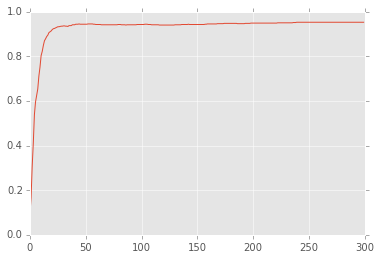

In [13]:
plt.plot(acc0)
print(np.amax(acc0))
print(acc0[-1])

In [25]:
def plot_epochs(az_angle, eleva):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0,200,200), np.linspace(0,10, 10))
    ax.plot_surface(np.linspace(0,100,100),fracerr, accu)
    ax.view_init(elev=eleva, azim=az_angle)

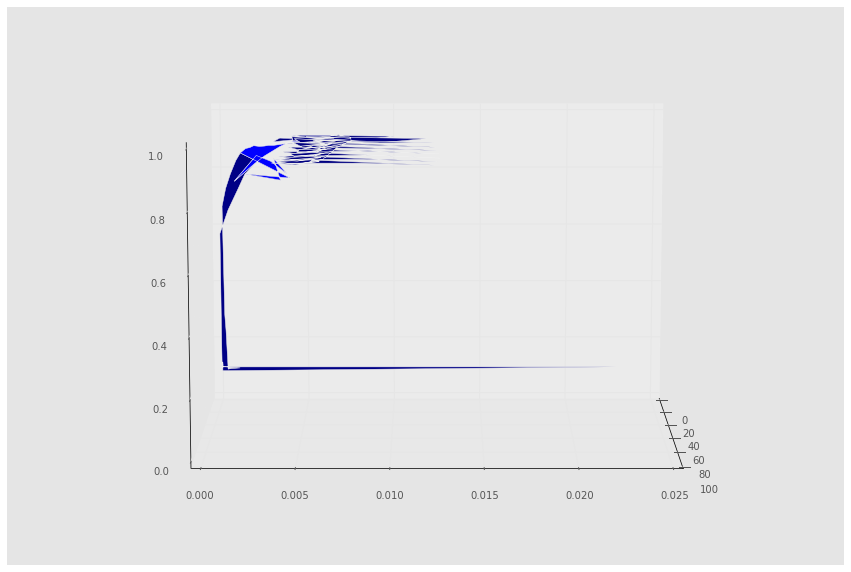

In [26]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1))

In [10]:
acc_max = []
fract_err = []
for i in range(50):
    acc_max.append(np.amax(accu[i]))
    fract_err.append(fracerr[i][0])
print(acc_max,fract_err)

([0.92587939698492461, 0.914572864321608, 0.91080402010050254, 0.87185929648241201, 0.90577889447236182, 0.91708542713567842, 0.91331658291457285, 0.90829145728643212, 0.92462311557788945, 0.91959798994974873, 0.89698492462311563, 0.914572864321608, 0.914572864321608, 0.91708542713567842, 0.93341708542713564, 0.93090452261306533, 0.90703517587939697, 0.93341708542713564, 0.92085427135678388, 0.91959798994974873, 0.89447236180904521, 0.91959798994974873, 0.89949748743718594, 0.93090452261306533, 0.92713567839195976, 0.91959798994974873, 0.90326633165829151, 0.88316582914572861, 0.90954773869346739, 0.92085427135678388, 0.90954773869346739, 0.90201005025125625, 0.93216080402010049, 0.90075376884422109, 0.90201005025125625, 0.91331658291457285, 0.9120603015075377, 0.90703517587939697, 0.93341708542713564, 0.91080402010050254, 0.9233668341708543, 0.90577889447236182, 0.93090452261306533, 0.9346733668341709, 0.91080402010050254, 0.92085427135678388, 0.89949748743718594, 0.90577889447236182,

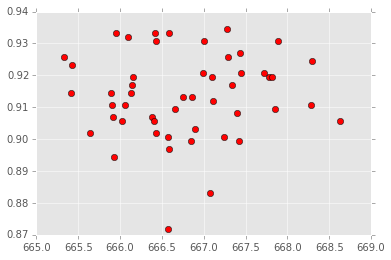

In [11]:
plt.plot(fract_err, acc_max, "ro")

In [12]:
sts.pearsonr(fract_err, acc_max)

(0.050482614923083119, 0.72772045942019747)